In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000]   # 데이터셋의 70%를 훈련셋/학습셋으로 사용
x_train = x_train[42000:] # 데이터셋의 30%를 검증셋으로 사용
y_val = y_train[:42000]   # 데이터셋의 70%를 훈련셋/학습셋으로 사용
y_train = y_train[42000:] # 데이터셋의 30%를 검증셋으로 사용

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

Using TensorFlow backend.


Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 117us/step - loss: 1.1511 - acc: 0.7256 - val_loss: 0.6600 - val_acc: 0.8370
Epoch 2/5
18000/18000 [==============================] - 2s 85us/step - loss: 0.5191 - acc: 0.8667 - val_loss: 0.4786 - val_acc: 0.8724
Epoch 3/5
18000/18000 [==============================] - 2s 84us/step - loss: 0.4141 - acc: 0.8867 - val_loss: 0.4146 - val_acc: 0.8840
Epoch 4/5
18000/18000 [==============================] - 2s 87us/step - loss: 0.3684 - acc: 0.8959 - val_loss: 0.3815 - val_acc: 0.8926
Epoch 5/5
10000/10000 [==============================] - 0s 22us/step

loss_and_metrics : [0.33103723052740097, 0.90649999999999997]


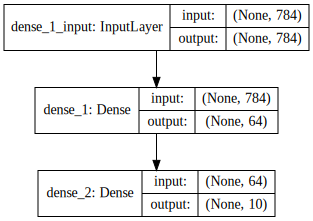

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [4]:
# 2. 모델 불러오기
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 103us/step - loss: 0.2618 - acc: 0.9269 - val_loss: 0.2936 - val_acc: 0.9162
Epoch 2/5
18000/18000 [==============================] - 2s 87us/step - loss: 0.2534 - acc: 0.9293 - val_loss: 0.2891 - val_acc: 0.9177
Epoch 3/5
18000/18000 [==============================] - 2s 88us/step - loss: 0.2460 - acc: 0.9312 - val_loss: 0.2817 - val_acc: 0.9201
Epoch 4/5
18000/18000 [==============================] - 2s 93us/step - loss: 0.2393 - acc: 0.9332 - val_loss: 0.2762 - val_acc: 0.9211
Epoch 5/5
10000/10000 [==============================] - 0s 22us/step

loss_and_metrics : [0.25109204970002175, 0.92830000000000001]
